In [8]:
# T3M40509.1_Programming for Data Science_WiSe23-24
    

# Importieren notwendiger Bibliotheken und Einlesen der Daten

### Importieren notwendiger Bibliotheken

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Einlesen der Daten

In [10]:
df_full = pd.read_csv("../Programmentwurf/Dataset/vehicles.csv")
df_full.head()


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


# Datenbereinigung

### Verkleinern des Datensatzes durch entfernen der URL-Spalten und der VIN

In [11]:
df = df_full.drop(['url', 'region_url', 'image_url', 'VIN'], axis=1)
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,drive,size,type,paint_color,description,county,state,lat,long,posting_date
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


### Anzeigen der Datentypen


In [12]:
df.dtypes

id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object

### Anpassen der Datentypen in besser passende und effizientere Datentypen

In [15]:
df['year'] = df['year'].astype('Int64')
df['odometer'] = df['odometer'].astype('Int64')
df['region'] = df['region'].astype('category')
df['manufacturer'] = df['manufacturer'].astype('category')
df['model'] = df['model'].astype('category')
df['condition'] = df['condition'].astype('category')
df['cylinders'] = df['cylinders'].astype('category')
df['fuel'] = df['fuel'].astype('category')
df['title_status'] = df['title_status'].astype('category')
df['transmission'] = df['transmission'].astype('category')
df['drive'] = df['drive'].astype('category')
df['size'] = df['size'].astype('category')
df['type'] = df['type'].astype('category')
df['paint_color'] = df['paint_color'].astype('category')
df['state'] = df['state'].astype('category')
df['description'] = df['description'].astype('string')
df['posting_date'] = pd.to_datetime(df['posting_date'], utc=True)
df['county'] = df['county'].astype('category')

df.dtypes

id                            int64
region                     category
price                         int64
year                          Int64
manufacturer               category
model                      category
condition                  category
cylinders                  category
fuel                       category
odometer                      Int64
title_status               category
transmission               category
drive                      category
size                       category
type                       category
paint_color                category
description          string[python]
county                     category
state                      category
lat                         float64
long                        float64
posting_date    datetime64[ns, UTC]
dtype: object

### Kürzen des Datensatzes auf die Top 99% der Daten nach Anzahl der Einträge pro Jahr

In [16]:
old_df_len = len(df)
year_counts = df['year'].value_counts().sort_index()
cumulative_percentage = year_counts.cumsum() / year_counts.sum()
cutoff_year = cumulative_percentage[cumulative_percentage > 0.01].index[0]
df = df[df['year'] >= cutoff_year]

print(f"Filtered DataFrame starts from year: {cutoff_year}")
print(f"Original DataFrame size: {old_df_len}, Filtered DataFrame size: {len(df)} -> The DataFrame has been reduced by {old_df_len - len(df)} rows")

Filtered DataFrame starts from year: 1967
Original DataFrame size: 426880, Filtered DataFrame size: 421584 -> The DataFrame has been reduced by 5296 rows


In [17]:
region_counts = df['region'].value_counts().sort_index()
region_counts

region
SF bay area               2894
abilene                    225
akron / canton            2194
albany                    2514
albuquerque               2911
                          ... 
york                       766
youngstown                 655
yuba-sutter               1739
yuma                       331
zanesville / cambridge     313
Name: count, Length: 404, dtype: int64

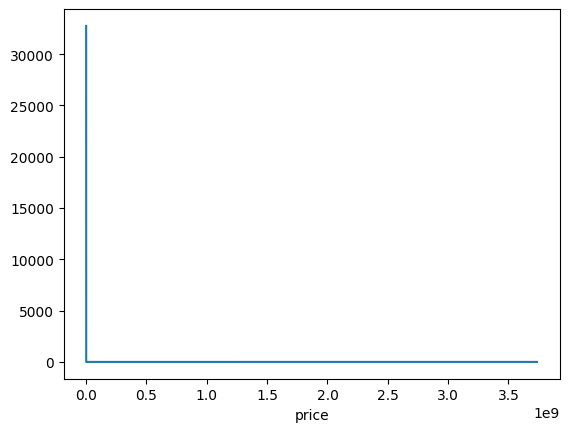

In [18]:
price_counts = df['price'].value_counts().sort_index()
price_counts.plot(kind='line')
plt.show()

region
columbus               3565
jacksonville           3545
eugene                 2970
salem                  2969
boston                 2967
                       ... 
meridian                 28
southwest MS             14
kansas city               9
fort smith, AR            9
west virginia (old)       8
Name: count, Length: 404, dtype: int64


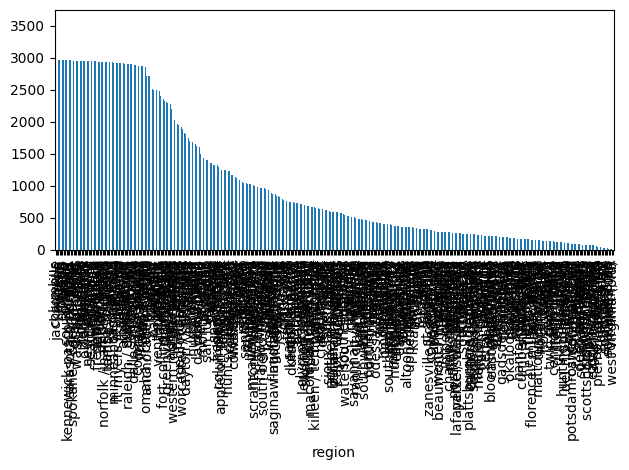

In [19]:
region_counts = df['region'].value_counts()
region_counts.plot(kind='bar')
plt.tight_layout()
print(region_counts)
plt.show()

In [20]:
temp_df = df['manufacturer'].unique()

# Convert numpy array to list and print
unique_manufacturers_list = list(temp_df)
print(unique_manufacturers_list)

['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram', 'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick', 'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo', 'subaru', nan, 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi', 'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini', 'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson', 'datsun', 'aston-martin', 'land rover', 'morgan']


In [21]:
temp_df = df['cylinders'].unique()

# Convert numpy array to list and print
unique_manufacturers_list = list(temp_df)
print(unique_manufacturers_list)

['8 cylinders', '6 cylinders', nan, '4 cylinders', '5 cylinders', 'other', '3 cylinders', '10 cylinders', '12 cylinders']


In [22]:
temp_df = df['condition'].unique()

# Convert numpy array to list and print
unique_manufacturers_list = list(temp_df)
print(unique_manufacturers_list)

['good', 'excellent', 'fair', nan, 'like new', 'new', 'salvage']


In [23]:
temp_df = df['fuel'].unique()

# Convert numpy array to list and print
unique_manufacturers_list = list(temp_df)
print(unique_manufacturers_list)

['gas', 'other', 'diesel', 'hybrid', nan, 'electric']


In [24]:
temp_df = df['title_status'].unique()

# Convert numpy array to list and print
unique_manufacturers_list = list(temp_df)
print(unique_manufacturers_list)

['clean', 'rebuilt', 'lien', nan, 'salvage', 'missing', 'parts only']


In [25]:
temp_df = df['transmission'].unique()

# Convert numpy array to list and print
unique_manufacturers_list = list(temp_df)
print(unique_manufacturers_list)

['other', 'automatic', 'manual', nan]


In [26]:
temp_df = df['drive'].unique()

# Convert numpy array to list and print
unique_manufacturers_list = list(temp_df)
print(unique_manufacturers_list)

[nan, 'rwd', '4wd', 'fwd']


In [27]:
temp_df = df['size'].unique()

# Convert numpy array to list and print
unique_manufacturers_list = list(temp_df)
print(unique_manufacturers_list)

[nan, 'full-size', 'mid-size', 'compact', 'sub-compact']


In [28]:
temp_df = df['type'].unique()

# Convert numpy array to list and print
unique_manufacturers_list = list(temp_df)
print(unique_manufacturers_list)

['pickup', 'truck', 'other', nan, 'coupe', 'SUV', 'hatchback', 'mini-van', 'sedan', 'offroad', 'bus', 'van', 'convertible', 'wagon']


In [29]:
temp_df = df['paint_color'].unique()

# Convert numpy array to list and print
unique_manufacturers_list = list(temp_df)
print(unique_manufacturers_list)

['white', 'blue', 'red', 'black', 'silver', 'grey', nan, 'brown', 'yellow', 'orange', 'green', 'custom', 'purple']


In [30]:
num_unique_manufacturers = df['condition'].nunique()

print(num_unique_manufacturers)

6


# Erstellen eines Beispiel-Datensatzes
Der Beispieldatensatz wird zur Entwicklung verwendet, damit sich die Rechenzeit während der Entwicklung verringert, da der ursprüngliche Datensatz sehr groß ist. Nur das Plotten von Grafiken kann somit viele Minuten in Anspruch nehmen. Zur Vorhersage und zur Produktivsetzung wird der vollständige Datensatz verwendet, da dieser dann nur einmal ausgeführt werden muss.

In [31]:
sampled_df = df.sample(frac=0.05, replace=False, random_state=1)

### Weiter gehts

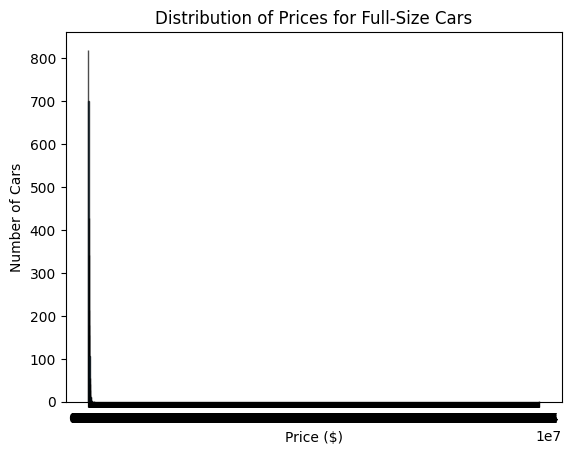

In [32]:
# Filter by 'full-size'
full_size_df = sampled_df[sampled_df['size'] == 'full-size']

# Define bins for price grouping, max price rounded to next highest $5000 if needed
max_price = full_size_df['price'].max()
bins = range(0, int(max_price) + 5000, 5000)

# Create a histogram
plt.hist(full_size_df['price'], bins=bins, edgecolor='black', alpha=0.7)
plt.title('Distribution of Prices for Full-Size Cars')
plt.xlabel('Price ($)')
plt.ylabel('Number of Cars')
plt.xticks(bins)

# Show the plot
plt.show()

In [33]:
sampled_df['price'].max()

1234567890

In [34]:
sorted_df = sampled_df.sort_values(by='price', ascending=False)
print(sorted_df.head())

                id               region       price  year manufacturer  \
153082  7305153975         indianapolis  1234567890  2006        volvo   
288401  7302112231       akron / canton    12345678  2019    chevrolet   
371065  7315062782  dallas / fort worth      299991  2017          NaN   
324462  7316254013             portland      239900  2018      porsche   
106389  7312991083              orlando      197999  2015          NaN   

                      model  condition     cylinders   fuel  odometer  ...  \
153082                  vnl       fair           NaN  other    200000  ...   
288401                  NaN       good   8 cylinders    gas    100000  ...   
371065  Lamborghini Huracan        NaN  10 cylinders    gas     13004  ...   
324462      911 gt3 touring        NaN           NaN  other      4224  ...   
106389  Lamborghini Huracan  excellent  10 cylinders    gas     33875  ...   

       drive       size   type paint_color  \
153082   NaN        NaN    NaN       bla

In [35]:
df['price'].median()

13900.0

### Abschneiden von Ausreißern
Alle Daten mit Preis > 100.000 Euro werden entfernt. Bei Gebrauchtwagen mit einem Wert > 100.000 Euro kann davon ausgegangen werden, dass es sich um sehr spezielle Fahrzeuge handelt, bei welchen sich der Preis nicht durch "normale" Parameter abbilden lässt.
Ein Beispiel hierfür sind Oldtimer oder sehr spezielle Fahrzeuge, wie z.B. ein Mercedes 300 SL. Der Preis für solche Fahrzeuge bildet sich aus der Seltenheit und einer gewissen Subjektiven Wertwahrnehmung.
Zusätzlich befinden sich Fahrzeuge im Datensatz, mit "Lückenfüller-Preisen", wie z.B. 123.456.789 Euro. Auch diese Ausreißer werden hiermit entfernt.

In [36]:
sampled_df = sampled_df[sampled_df['price'] <= 100000]

Alle Daten mit Preise >= 0 werden aussortiert, da es sehr unwahrscheinlich ist, dass Gebrauchtwagen verschenkt werden. Es ist wahrscheinlicher, dass es sich hierbei um Lückenfüller handelt. Da der Preis aber ein sehr grundlegender 
Parameter für unsere Analyse ist, oder sogar unsere Zielvariable, werden alle Daten mit einem Preis von 0 aussortiert.


In [37]:
sampled_df = sampled_df[sampled_df['price'] > 0]

Abschneiden Meilenstand > 5.000.000

In [38]:
sampled_df = sampled_df[sampled_df['odometer'] <= 500000]

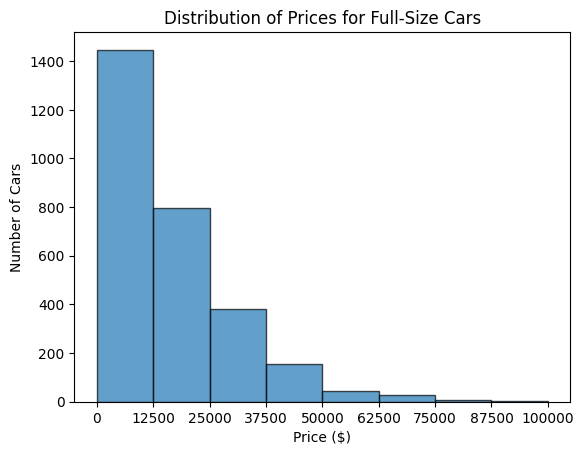

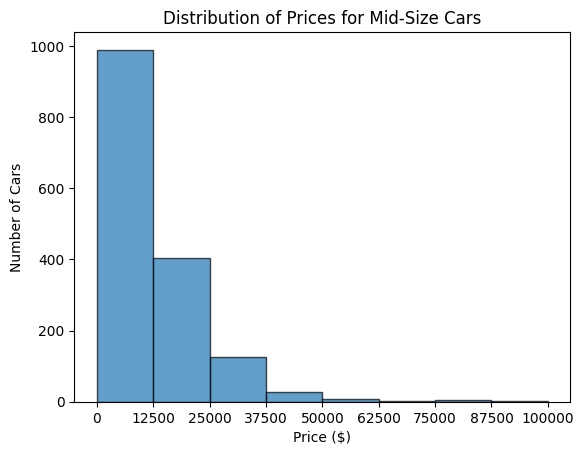

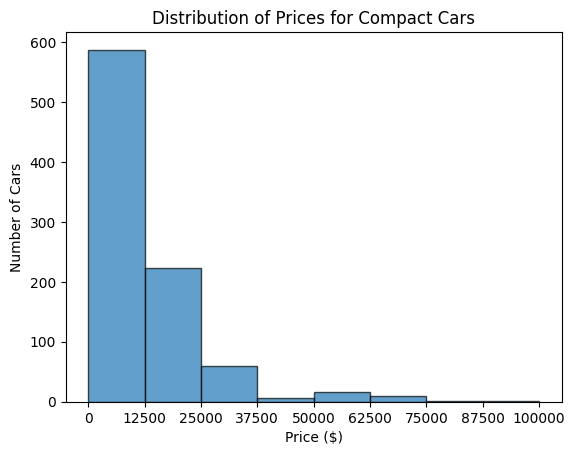

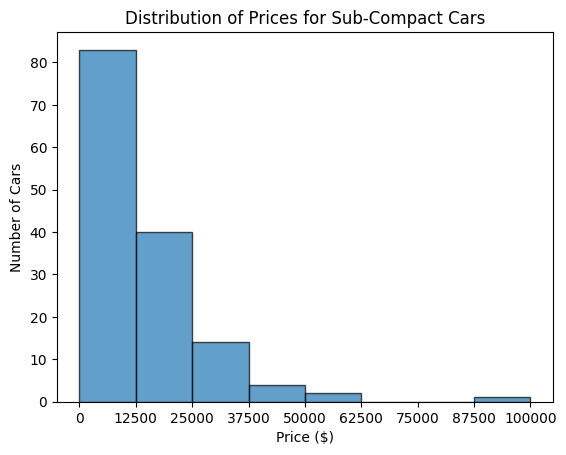

In [39]:
# Filter by 'full-size'
full_size_df = sampled_df[sampled_df['size'] == 'full-size']

# Define bins for price grouping, max price rounded to next highest $12500 if needed
max_price = full_size_df['price'].max()
bins = range(0, int(max_price) + 12500, 12500)

# Create a histogram
plt.hist(full_size_df['price'], bins=bins, edgecolor='black', alpha=0.7)
plt.title('Distribution of Prices for Full-Size Cars')
plt.xlabel('Price ($)')
plt.ylabel('Number of Cars')
plt.xticks(bins)

# Show the plot
plt.show()

# _____________________________________________________________________________________

# Filter by 'mid-size'
full_size_df = sampled_df[sampled_df['size'] == 'mid-size']

# Define bins for price grouping, max price rounded to next highest $12500 if needed
max_price = full_size_df['price'].max()
bins = range(0, int(max_price) + 12500, 12500)

# Create a histogram
plt.hist(full_size_df['price'], bins=bins, edgecolor='black', alpha=0.7)
plt.title('Distribution of Prices for Mid-Size Cars')
plt.xlabel('Price ($)')
plt.ylabel('Number of Cars')
plt.xticks(bins)

# Show the plot
plt.show()

# _____________________________________________________________________________________

# Filter by 'compact'
full_size_df = sampled_df[sampled_df['size'] == 'compact']

# Define bins for price grouping, max price rounded to next highest $12500 if needed
max_price = full_size_df['price'].max()
bins = range(0, int(max_price) + 12500, 12500)

# Create a histogram
plt.hist(full_size_df['price'], bins=bins, edgecolor='black', alpha=0.7)
plt.title('Distribution of Prices for Compact Cars')
plt.xlabel('Price ($)')
plt.ylabel('Number of Cars')
plt.xticks(bins)

# Show the plot
plt.show()

# _____________________________________________________________________________________

# Filter by 'sub-compact'
full_size_df = sampled_df[sampled_df['size'] == 'sub-compact']

# Define bins for price grouping, max price rounded to next highest $12500 if needed
max_price = full_size_df['price'].max()
bins = range(0, int(max_price) + 12500, 12500)

# Create a histogram
plt.hist(full_size_df['price'], bins=bins, edgecolor='black', alpha=0.7)
plt.title('Distribution of Prices for Sub-Compact Cars')
plt.xlabel('Price ($)')
plt.ylabel('Number of Cars')
plt.xticks(bins)

# Show the plot
plt.show()

In [41]:
sampled_df['paint_color'].unique()

['brown', NaN, 'custom', 'black', 'white', ..., 'grey', 'yellow', 'green', 'orange', 'purple']
Length: 13
Categories (12, object): ['black', 'blue', 'brown', 'custom', ..., 'red', 'silver', 'white', 'yellow']